In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import datatable as dt
import datetime
from functions import *

In [15]:
#TODO: 
# Merge all ex
# 4.4
# 6.2
# 8.2

# Import dataframes

### Posts

In [2]:
%%time

posts_datatable = dt.fread("instagram_posts.csv")

CPU times: user 43.2 s, sys: 24.5 s, total: 1min 7s
Wall time: 20.1 s


In [3]:
posts_datatable

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06T20:06:57,2,Wreckloose! Deevalley bike park laps on the @intensecycles recluse!\n@alfjonescycles \n@saddleback_l…,80,0
1,28370932,−1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19T09:31:16,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe in male lace rompers and boneless watermelon\n\nTag u…,25,1
2,28370933,−1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11T20:05:03,1,#meraviglia #incensi #the #candele #profumo #amicizia #primavera #starshine,9,0
3,28370934,−1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13T16:27:16,1,#teatime #scorpion #friends #love #mountains #september,4,0
4,28370935,−1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18T10:19:27,1,thE sky gavE mE a #constEllation,8,0
5,28370964,−1,BrYDPJeABJQ,16262389,282618748,2018-12-14T18:16:15,1,#beautiful #Christmas #lights,138,15
6,28370957,−1,BmQ418mgSnL,35673872,282618748,2018-08-09T17:53:46,1,As per your suggestion. #themerrytriotakeslondon,389,10
7,28370960,−1,Bm1YQ3Hn1gJ,840873396,282618748,2018-08-23T22:00:59,1,-Blue-💙,198,23
8,28370961,−1,2qBVjbTgzi,329994,282618748,2015-05-14T11:02:05,1,everything still feels so surreal ☁️,127,8


In [4]:
%%time

posts=posts_datatable.to_pandas()
posts

CPU times: user 39.9 s, sys: 1min 32s, total: 2min 12s
Wall time: 6min 15s


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80.0,0.0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25.0,1.0
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03,1,#meraviglia #incensi #the #candele #profumo #a...,9.0,0.0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16,1,#teatime #scorpion #friends #love #mountains #...,4.0,0.0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27,1,thE sky gavE mE a #constEllation,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42710192,28370925,-1,BcpWMWGBfxh,5.556457e+09,4.574268e+14,2017-12-13 15:38:04,1,Mm not bad but not so pretty😕\n#puthtroop#puth...,74.0,0.0
42710193,28370926,-1,Ba6LZWwlCl8,3.371865e+08,4.574268e+14,2017-10-31 11:28:01,1,🌸🌺,49.0,0.0
42710194,28370929,-1,BPN0kM1hYUw,3.289886e+09,4.574268e+14,2017-01-13 20:16:37,1,#pasanlosaños #creweedrepresent #SlgFamily,18.0,0.0
42710195,28370997,-1,BxsZ8nDBr-L,8.536366e+09,4.267235e+06,2019-05-20 20:07:52,1,Estão se divertindo?,27.0,1.0


### Profiles

In [2]:
profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t')
profiles.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


### Locations

In [6]:
locations = pd.read_csv('instagram_locations.csv', delimiter='\t')
locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


# [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

# [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

## RQ2.1: Plot the number of posts for each profile in descending order.


In [3]:
profiles2 = profiles[['profile_name','n_posts']]

In [4]:
profiles2

,profile_name,n_posts
0,jphillip033,170.0
1,mama_haas,2878.0
2,yellowlightbreen,431.0
3,tec1025,NaN
4,luckyfluff,NaN
...,...,...
4509581,karenarkesteyn,497.0
4509582,jornvlaeminck,NaN
4509583,s_degol,NaN
4509584,anwilms,183.0


In [5]:
#Let's check for NA values
profiles2['n_posts'].isnull().values.any()

True

A lot, we must manage them

In [6]:
#Let's drop all na values
profiles2.dropna(inplace=True)

<ipython-input-6-9d6f23269dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles2.dropna(inplace=True)


In [7]:
# Let's check NAs again
profiles2['n_posts'].isnull().values.any()

False

In [8]:
profiles2

,profile_name,n_posts
0,jphillip033,170.0
1,mama_haas,2878.0
2,yellowlightbreen,431.0
5,sabahlke,590.0
6,masslivehs,753.0
...,...,...
4509578,charlesgardiner,576.0
4509579,_ryanmckenzie,193.0
4509580,oscarinw,30.0
4509581,karenarkesteyn,497.0


Good, we can continue now

In [10]:
profiles2=profiles2.sort_values('n_posts', ascending=False)

In [11]:
profiles2

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
...,...,...
2402230,faith.dever,0.0
2402229,sugarsprinkledglitter,0.0
377966,hannahkraft13,0.0
2402225,4pf_cj_,0.0


In [12]:
count_post=profiles2.groupby('n_posts').count()
count_post

,profile_name
n_posts,
0.0,197877
1.0,72946
2.0,53633
3.0,50100
4.0,41342
...,...
117262.0,1
125220.0,1
126340.0,1


In [13]:
count_post.iloc[1:].sum()

profile_name    3254894
dtype: int64

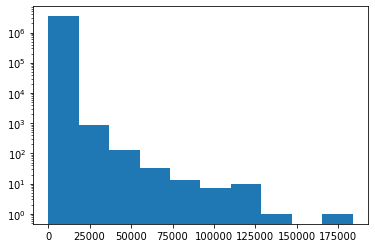

In [14]:
h=profiles2['n_posts']
plt.hist(h,log=True)
plt.show()

##### What can we say about this result?

As we can see, the majority of the instagram profiles have no posts, meanwhile only a small proportion have posted more than 125.000 posts.

## RQ2.2 What posts have the highest number of "likes"?

This is the top 10 of most liked posts

In [9]:
%%time

df=posts[['post_id','numbr_likes']].sort_values(by='numbr_likes', ascending=False).head(10)

df.index=['Post '+str(i+1) for i in range(10)]

df.head(10)

NameError: name 'posts' is not defined

## RQ2.3 What posts have the most and the least number of comments?

In [ ]:
%%time

comments=posts[['post_id','number_comments']]

top_comm=comments.sort_values(by='number_comments', ascending=False)
least_comm=comments.sort_values(by='number_comments', ascending=True)

In [ ]:
#This is the top 10 of posts which have the most number of comments
top_comm.head(10)

In [ ]:
#These are the 10 posts which have the least number of comments
least_comm.head(10)


#There are many posts with zero comment, these are only ten of them, randomly

## RQ2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [ ]:
posts2=posts[['location_id','post_id']]

yes_location=len(posts2[np.isnan(posts2['location_id']) == False])
yes_location

In [ ]:
no_location=len(posts2[np.isnan(posts2['location_id']) == True])
no_location

In [ ]:
#Showing the result using a pie chart, which is very usefull to catch the difference between the 
total_posts=yes_location+no_location
yes_perc='{:.1%}'.format(yes_location/total_posts)
no_perc='{:.1%}'.format(no_location/total_posts)
myexplode=[0.0,0.1]

#The plots
fig, axs = plt.subplots(1,2)
axs[0].pie([yes_location,no_location], labels=[yes_perc,no_perc], 
        labeldistance=1.15, colors=['steelblue','chocolate'], 
           explode=myexplode)
axs[1].pie([yes_location,no_location], labels=['{:,}'.format(yes_location),'{:,}'.format(no_location)], 
        labeldistance=1.15, colors=['steelblue','chocolate'], explode=myexplode)
plt.legend(['yes_location','no_location'], bbox_to_anchor=(0.85,1.025), loc="upper left")

# Some cool features
fig.tight_layout(pad=2.0)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show() #remove the annoying text

#### What did we get?

As we can see, the pie chart hightlights how small is the percentage of posts that do not include a tagged position. On the other side, the majority of the analyzed posts include tagged location.

## RQ2.5 How many posts include only photos? How many also have videos?

In [ ]:
%%time 
#first we groupBy and count by "post_type"
total=posts[['post_type','post_id']].groupby('post_type').count()

#number of post that incluse photos
photos=int(total.values[0])

#number of video that include videos
photos_and_videos=int(total.values[2])

total

In [ ]:
print('The posts that include only photos are: ','{:,}'.format(photos))

In [ ]:
print('The posts that include both photos and videos are: ','{:,}'.format(photos_and_videos))

## RQ2.6 What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [ ]:
#Let's select the variables we are interested in 
profiles2 = profiles[['is_business_account','profile_name']]

In [ ]:
# Let's give a look to the dataset
profiles2

In [ ]:
#We can already see some NaN, let's do a proper check 
profiles['is_business_account'].isnull().values.any()

In order to find a meaningfull percentage of business accounts vs non-business, we drop all the NaN values

In [ ]:
profiles2.dropna(inplace=True)

In [ ]:
#Now let's check again if it worked
profiles2['is_business_account'].isnull().values.any()

In [ ]:
# Cool, now let's count how many business account
Business_account=len(profiles2[profiles2['is_business_account'] == True])
Business_account

In [ ]:
# Now let's count how many NOT business account
Not_business_account= len(profiles[profiles['is_business_account'] == False])
Not_business_account

In [ ]:
#Now let's give a look at the percentage of Business Account on the total amount of accounts
'{:.1%}'.format(Business_account/(Business_account+Not_business_account))

In [ ]:
#Showing the result using a pie chart, which is very usefull to catch the difference between the 
total_account=Business_account+Not_business_account
yes_perc='{:.1%}'.format(Business_account/total_account)
no_perc='{:.1%}'.format(Not_business_account/total_account)
myexplode=[0.0,0.1]

#The plots
fig, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].pie([Business_account,Not_business_account], labels=[yes_perc,no_perc], 
        labeldistance=1.15, colors=['steelblue','chocolate'], 
           explode=myexplode)
axs[1].pie([Business_account,Not_business_account], labels=['{:,}'.format(Business_account),'{:,}'.format(Not_business_account)], 
        labeldistance=1.15, colors=['steelblue','chocolate'], explode=myexplode)
plt.legend(['Business_account','Not_business_account'], bbox_to_anchor=(1.25,1.125), loc="upper left")

# Some cool features
fig.tight_layout(pad=2.0)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show() #remove the annoying text

Since the percentage of business account on the total account is 24.8%, it means that for 3 non-business account there is a business account on our dataset. 

# [RQ3] Now it's important to understand the most common times in which users publish their posts

## RQ3.1 What is the most common time in which users publish their posts?

In [136]:
#Let's select the variables we are interested in 
posts2=posts[['cts','post_id']]

,cts,post_id
0,2017-08-06 20:06:57,BXdjjUlgcgq
1,2017-06-19 09:31:16,BVg0pbolYBC
2,2017-03-11 20:05:03,BRgkjcXFp3Q
3,2016-09-13 16:27:16,BKTKeNhjEA7
4,2015-10-18 10:19:27,8-NQrvoYLX
...,...,...
42710192,2017-12-13 15:38:04,BcpWMWGBfxh
42710193,2017-10-31 11:28:01,Ba6LZWwlCl8
42710194,2017-01-13 20:16:37,BPN0kM1hYUw
42710195,2019-05-20 20:07:52,BxsZ8nDBr-L


In [176]:
#Now let's count how many posts there are for each time
total_time=posts2.groupby('cts').count()
total_time.reset_index(inplace=True)

#Then sort it and select the 5 most common time
top_5_times= total_time.sort_values('post_id',ascending=False).head(5)
top_5_times['cts'].head()

,cts,post_id
20694125,2019-05-29 23:41:46,29
20694126,2019-05-29 23:41:47,28
20694124,2019-05-29 23:41:45,28
20694130,2019-05-29 23:41:51,27
20694127,2019-05-29 23:41:48,26


In [178]:
# Then the most common time
most_common_time=top_5_times[['cts']].head(1)
for i in most_common_time.cts:
    print('The most common time in which users publish their posts is '+ str(i.time())+'.')


The most common time in which users publish their posts is 23:41:46.


## RQ3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

The function created for this Task can be seen in the "functions.py" files in the main repository

In [77]:
def time_intervals(intervals):
    posts2=posts[['cts','post_id']]
    posts2['cts'] = pd.to_datetime(posts2['cts']).dt.time

    f, ax = plt.subplots(figsize=(15,5)) # set the size that you'd like (width, height)
    ax.ticklabel_format(useOffset=False, style='plain')
    
    cases=[]
    for time in intervals:
        initial = datetime.datetime.strptime(time[0][0], "%H:%M:%S").time()
        final = datetime.datetime.strptime(time[1][0], "%H:%M:%S").time()

        num=len(posts2[(posts2.cts < final) & (posts2.cts > initial)])
        
        interval=str(time[0][0])+'-'+str(time[1][0])

        plt.bar(interval, height= num)

        cases.append('{:,}'.format(num))
    ax.legend(cases)
    plt.show()


  
    
    

## RQ3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals:
| Initial time | Final time   |
|--------------|--------------|
|   06:00:00   |    10:59:59  |
|   11:00:00   |    13:59:59  |
|   14:00:00   |    16:59:59  |
|   17:00:00   |    19:59:59  |
|   20:00:00   |    23:59:59  |
|   00:00:00   |    02:59:59  |
|   03:00:00   |    05:59:59  |



/var/folders/f8/5qj1kgpj0jv663dcg8r4dqwr0000gn/T/ipykernel_50383/3534270039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts2['cts'] = pd.to_datetime(posts2['cts']).dt.time


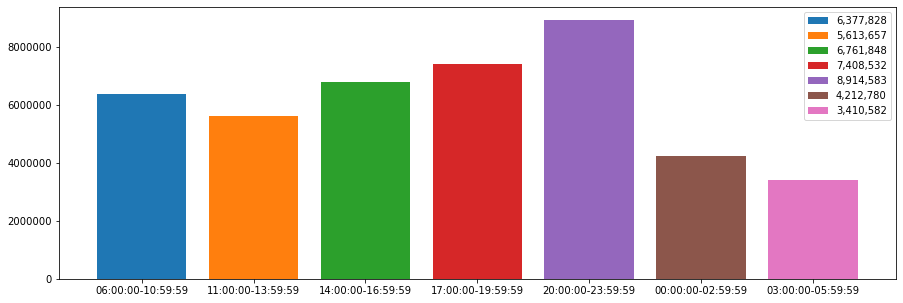

In [78]:
first_interval=[['06:00:00'],['10:59:59']]
second_interval=[['11:00:00'],['13:59:59']]
third_interval=[['14:00:00'],['16:59:59']]
fourth_interval=[['17:00:00'],['19:59:59']]
fifth_interval=[['20:00:00'],['23:59:59']]
sixth_interval=[['00:00:00'],['02:59:59']]
seventh_interval=[['03:00:00'],['05:59:59']]

time_intervals([first_interval,second_interval,third_interval,fourth_interval,fifth_interval,sixth_interval,seventh_interval])

As we can see, the users mainly prefer to post between 20:00:00 and 23:59:59, while from 03:00:00 to 05:59:59 is the most uncommon time to post.

# [RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

## RQ4.1 Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [28]:
def searchpost(profile_id):
    df=posts[posts.profile_id == profile_id]
    return df[['post_id','profile_id','numbr_likes','number_comments','location_id','post_type']]

In [11]:
searchpost(profile_id=3.0)

,post_id,profile_id,numbr_likes,number_comments,location_id,post_type
1781533,EQltd,3.0,390.0,27.0,1.444006e+06,1
1939650,vY,3.0,92.0,5.0,2.166905e+08,1
2665638,QK72l,3.0,1295.0,23.0,2.435929e+08,1
3111012,SYx-3pABAy,3.0,7477.0,132.0,1.029824e+09,1
4225968,cz,3.0,115.0,8.0,8.030000e+02,1
7017554,TxM22,3.0,3343.0,87.0,5.400000e+01,1
7042626,NQD4KAABKF,3.0,6417.0,148.0,2.705200e+04,1
30920283,L-RzGwgBFZ,3.0,7020.0,226.0,2.151232e+08,1
32570511,J5pNU,3.0,1392.0,56.0,3.399500e+04,1
33906912,NLGU6,3.0,1501.0,43.0,2.191180e+05,1


## RQ4.2 Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [12]:
def top_posts(n):
    df=pd.DataFrame(columns=['profile_id','post_id'])
    top=profiles.sort_values(by='n_posts', ascending=False).head(n)
    for profile_id in top.profile_id.values:
        df=pd.concat([df,searchpost(profile_id)])
    return df

In [16]:
top_posts(10)

,profile_id,post_id,numbr_likes,number_comments,location_id,post_type
9592952,199664772.0,Bq3hP3Khp8J,0.0,0.0,1.029593e+09,1.0
9592953,199664772.0,Bq3hN53hUsD,0.0,0.0,1.029593e+09,1.0
9592954,199664772.0,BCqCe9LypeF,27.0,0.0,1.029569e+09,1.0
9592955,199664772.0,20Wu4zypd2,28.0,0.0,2.373984e+08,1.0
9592956,199664772.0,BrKq76AhadU,1.0,0.0,3.213373e+08,1.0
...,...,...,...,...,...,...
11565172,285549744.0,Bz2KZMWAzaS,0.0,0.0,2.618077e+14,1.0
11565173,285549744.0,Bz2KIsGguxY,0.0,0.0,5.229182e+06,1.0
11565174,285549744.0,Bz2JMmhA1Bv,0.0,0.0,7.834658e+08,1.0
27484079,285549744.0,BxR5tuQAfxT,0.0,0.0,8.219436e+14,1.0


## RQ4.3 What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [200]:
top_ten=top_posts(10)
top_ten

,profile_id,post_id,numbr_likes,number_comments,location_id,post_type
9592952,199664772.0,Bq3hP3Khp8J,0.0,0.0,1.029593e+09,1.0
9592953,199664772.0,Bq3hN53hUsD,0.0,0.0,1.029593e+09,1.0
9592954,199664772.0,BCqCe9LypeF,27.0,0.0,1.029569e+09,1.0
9592955,199664772.0,20Wu4zypd2,28.0,0.0,2.373984e+08,1.0
9592956,199664772.0,BrKq76AhadU,1.0,0.0,3.213373e+08,1.0
...,...,...,...,...,...,...
11565172,285549744.0,Bz2KZMWAzaS,0.0,0.0,2.618077e+14,1.0
11565173,285549744.0,Bz2KIsGguxY,0.0,0.0,5.229182e+06,1.0
11565174,285549744.0,Bz2JMmhA1Bv,0.0,0.0,7.834658e+08,1.0
27484079,285549744.0,BxR5tuQAfxT,0.0,0.0,8.219436e+14,1.0


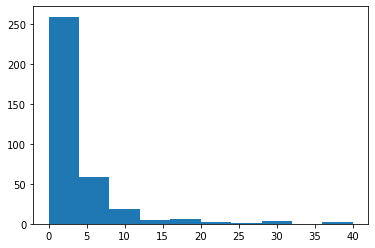

In [48]:
#Let's see the distribution of likes 
plt.hist(top_ten['numbr_likes'])
plt.show()

In [49]:
#The average of "likes" of the top 10 profiles with the highest number of posts
top_ten['numbr_likes'].mean()

3.1713483146067416

In [50]:
#Let's check the median in order to know moe about our distribution
top_ten['numbr_likes'].median()

2.0

Since the median (2.0) is smaller than the average (3.17), it means that our distribution is asymmetric due to some posts which have a huge amount of likes, as matter of fact, the mean is a statistic influenced by exteme observations. On the other hand, the median is a **robust statistic** because it is not affected by outliers. In our case, we can see that half of the posts have less than 2 likes, while the other half have more than 2 likes.

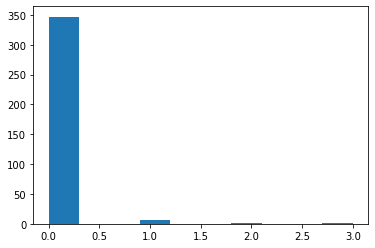

In [51]:
#Let's see the distribution of likes 
plt.hist(top_ten['number_comments'])
plt.show()

In [52]:
#The average of "comments" of the top 10 profiles with the highest number of posts
top_ten['number_comments'].mean()

0.033707865168539325

In [53]:
top_ten['number_comments'].median()

0.0

Taking into account the comments of the top 10 profiles with the highest number of posts, we can see how, on average, the posts show no comments, except for some posts which have less than 3. 

## RQ4.4 Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

# [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

## RQ5.1 Plot the top 10 most popular users in terms of followers and their number of posts.

In [8]:
profiles2 = profiles[['profile_name','n_posts', 'followers','profile_id']]

In [9]:
#Let's check for NaN values in 'n_posts'
profiles2['n_posts'].isnull().sum()

1056815

In [10]:
#Let's check for NaN values in 'follower'
profiles2['followers'].isnull().sum()

1056815

In [11]:
#Let's drop them
profiles2.dropna(inplace=True)

/Users/the_redd_/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
#Verify it
profiles2['n_posts'].isnull().sum() == profiles2['followers'].isnull().sum() == 0

True

In [13]:
#Let's sort profiles in ascending order by followers and n_posts
top_profiles=profiles2.sort_values(by=['followers','n_posts'], ascending=False).head(10)
top_profiles

,profile_name,n_posts,followers,profile_id
2880218,instagram,5760.0,285457645.0,2.502532e+07
2582507,victoriassecret,7355.0,65269440.0,3.416684e+06
3820939,nba,28816.0,35339708.0,2.082449e+07
701965,louisvuitton,3352.0,30689316.0,1.876191e+08
2414951,buzzfeedtasty,2791.0,30246783.0,2.125507e+09
2785241,andresiniesta8,990.0,29542143.0,4.968651e+08
333193,hm,4566.0,29176804.0,2.341008e+07
3934581,princessyahrini,4719.0,29042823.0,2.423993e+07
1311970,danbilzerian,1311.0,26476004.0,5.041706e+07
1703764,akshaykumar,1173.0,26252169.0,9.070254e+08


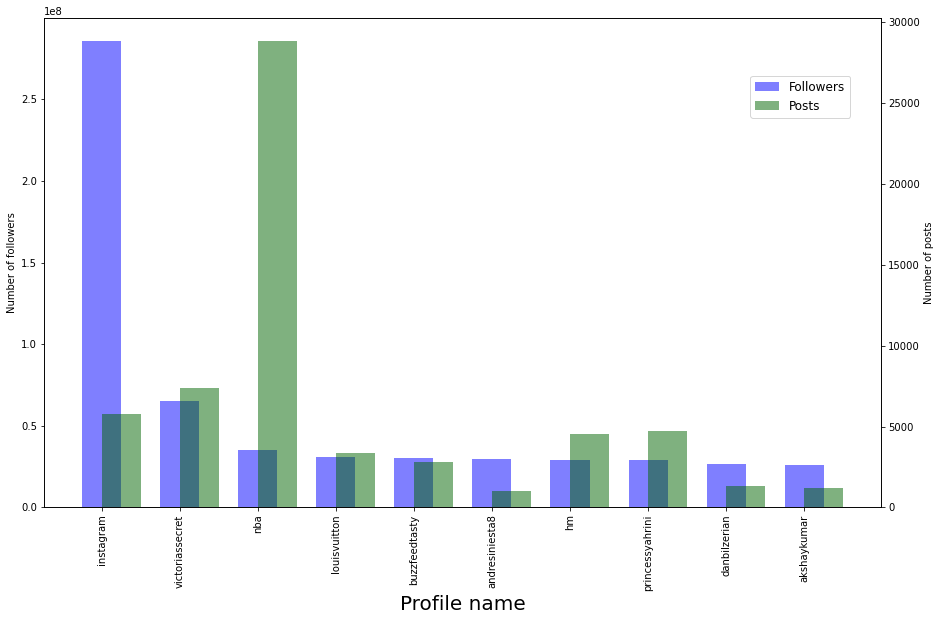

In [135]:
#Now let's plot it
#I'm using white labels because my theme on VS is dark
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.set_xlabel('Profile name',size=20)
ax1.xaxis.label.set_color('black')
ax1.yaxis.label.set_color('black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
# plot line chart on axis #1
ax1.bar(top_profiles['profile_name'], top_profiles['followers'], width=0.5, alpha=0.5, color='Blue')
ax1.set_ylabel('Number of followers')
plt.xticks(top_profiles['profile_name'], top_profiles['profile_name'], rotation='vertical')
#ax1.set_ylim(0, 25)
# set up the 2nd axis
ax2 = ax1.twinx()
ax2.yaxis.label.set_color('black')
ax2.tick_params(axis='y', colors='black')


# plot bar chart on axis #2
ax2.bar(top_profiles['profile_name'], top_profiles['n_posts'], width=0.5, alpha=0.5, color='darkgreen', align='edge')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of posts')
#ax2.set_ylim(0, 90)
fig.legend(['Followers','Posts'], loc="upper center",bbox_to_anchor=(0.5, 0.3, 0.65, 0.5),fontsize='large')
plt.show()

## RQ5.2 Who is the most influential user?

In [69]:
profiles2 = profiles[['profile_name', 'followers', 'profile_id']]

In [70]:
#Let's check for NaN values in 'n_posts'
profiles2['followers'].isnull().sum()

1056815

In [71]:
#Let's drop them
profiles2.dropna(inplace=True)

/Users/the_redd_/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [72]:
#Let's check for NaN values in 'follower' again
profiles2['followers'].isnull().sum()

0

In [73]:
#Verify it
profiles2['followers'].isnull().sum() == 0

True

In [74]:
#Let's sort
sorted_profile=profiles2.sort_values(by='followers', ascending=False)

In [75]:
# Let's see the result
print('The most influential user is "',sorted_profile.head(1)['profile_name'].values[0], 
      '" with ','{:,}'.format(int(sorted_profile.head(1)['followers'])), ' followers')

The most influential user is " instagram " with  285,457,645  followers


## RQ5.3 Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [76]:
locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [136]:
top_profiles

,profile_name,n_posts,followers,profile_id
2880218,instagram,5760.0,285457645.0,2.502532e+07
2582507,victoriassecret,7355.0,65269440.0,3.416684e+06
3820939,nba,28816.0,35339708.0,2.082449e+07
701965,louisvuitton,3352.0,30689316.0,1.876191e+08
2414951,buzzfeedtasty,2791.0,30246783.0,2.125507e+09
2785241,andresiniesta8,990.0,29542143.0,4.968651e+08
333193,hm,4566.0,29176804.0,2.341008e+07
3934581,princessyahrini,4719.0,29042823.0,2.423993e+07
1311970,danbilzerian,1311.0,26476004.0,5.041706e+07
1703764,akshaykumar,1173.0,26252169.0,9.070254e+08


In [139]:
df=pd.merge(posts,top_profiles, on='profile_id')
df=df[['location_id','post_id','profile_id']]
df

,location_id,post_id,profile_id
0,5.332856e+06,Ss3ULFBQeM,25025320.0
1,5.873874e+08,BeECzRuh1O6,25025320.0
2,8.770667e+14,Brl3hGMAxiy,25025320.0
3,3.500213e+08,BZNHb3ijnDT,25025320.0
4,5.243120e+08,uvObMahQV4,25025320.0
...,...,...,...
136,NaN,Bw1f3pPnJRr,496865116.0
137,3.669021e+08,Bwy8GNBH9ZH,496865116.0
138,NaN,Bwx0Wunn1S8,496865116.0
139,NaN,BwwM4ANnEbm,496865116.0


In [140]:
df.rename(columns={'location_id':'id'},inplace=True)
last_df=pd.merge(df,locations,on='id')
last_df


,id,post_id,profile_id,sid,name,street,zip,city,region,cd,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,5.332856e+06,Ss3ULFBQeM,25025320.0,762145,Rosa Parks Plaza,250 N Lamar St,75202,"Dallas, Texas",NaN,US,...,Downtown Dallas,downtown-dallas,US,United States,-96.804370,32.780616,NaN,rosa-parks-plaza,NaN,2019-05-30 21:26:01.789
1,5.873874e+08,BeECzRuh1O6,25025320.0,775485,Ethiopian Highlands,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.166667,10.000000,NaN,ethiopian-highlands,NaN,2019-05-31 11:22:21.183
2,8.770667e+14,Brl3hGMAxiy,25025320.0,804342,Machu Picchu,Machu Picchu,NaN,"Cusco, Peru",NaN,PE,...,Mondor Pampa Aserradero,mondor-pampa-aserradero,PE,Peru,-72.545428,-13.164656,MachuPicchuWonderOfTheWorld,machu-picchu,NaN,2019-06-01 16:12:10.227
3,3.500213e+08,BZNHb3ijnDT,25025320.0,838341,Parkland County,NaN,NaN,"Stony Plain, Alberta",NaN,CA,...,NaN,NaN,NaN,NaN,-114.006000,53.530000,NaN,parkland-county,http://www.parklandcounty.com,2019-06-03 04:41:24.810
4,5.243120e+08,uvObMahQV4,25025320.0,553843,Brodie Castle,Off A96,IV36 2TE,Forres,NaN,GB,...,NaN,NaN,NaN,NaN,-3.708948,57.598415,BrodieCastleNTS,brodie-castle,http://www.nts.org.uk/Property/Brodie-Castle/,2019-05-20 06:54:27.693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2.019565e+15,BxKKpXgH48n,496865116.0,143960,SOFIA Barcelona,"Plaça de Pius XII, 4",08028,"Barcelona, Spain",NaN,ES,...,Sants,sants,ES,Spain,2.123108,41.386388,NaN,sofia-barcelona,NaN,2019-03-06 09:24:10.102
101,3.669021e+08,BxFisg0HMtu,496865116.0,26977,"Kobe-shi, Hyogo, Japan",NaN,NaN,"Kobe-shi, Hyogo, Japan",NaN,JP,...,Kobe-shi,kobe-shi,JP,Japan,135.191300,34.696400,NaN,kobe-shi-hyogo-japan,http://www.city.kobe.lg.jp,2019-02-27 00:47:38.247
102,3.669021e+08,BxATHJpHI_U,496865116.0,26977,"Kobe-shi, Hyogo, Japan",NaN,NaN,"Kobe-shi, Hyogo, Japan",NaN,JP,...,Kobe-shi,kobe-shi,JP,Japan,135.191300,34.696400,NaN,kobe-shi-hyogo-japan,http://www.city.kobe.lg.jp,2019-02-27 00:47:38.247
103,3.669021e+08,Bwy8GNBH9ZH,496865116.0,26977,"Kobe-shi, Hyogo, Japan",NaN,NaN,"Kobe-shi, Hyogo, Japan",NaN,JP,...,Kobe-shi,kobe-shi,JP,Japan,135.191300,34.696400,NaN,kobe-shi-hyogo-japan,http://www.city.kobe.lg.jp,2019-02-27 00:47:38.247


In [166]:
df_locations=last_df[['post_id','city']].groupby('city').count()
new_df_locations=df_locations.sort_values(by='post_id',ascending=False)
new_df_locations

,post_id
city,
"New York, New York",9
"Sydney, Australia",9
"Los Angeles, California",5
Singapore,4
"Houston, Texas",3
...,...
"Kowloon, Hong Kong",1
"Krian, Jawa Timur, Indonesia",1
"La Madrague, Alger, Algeria",1


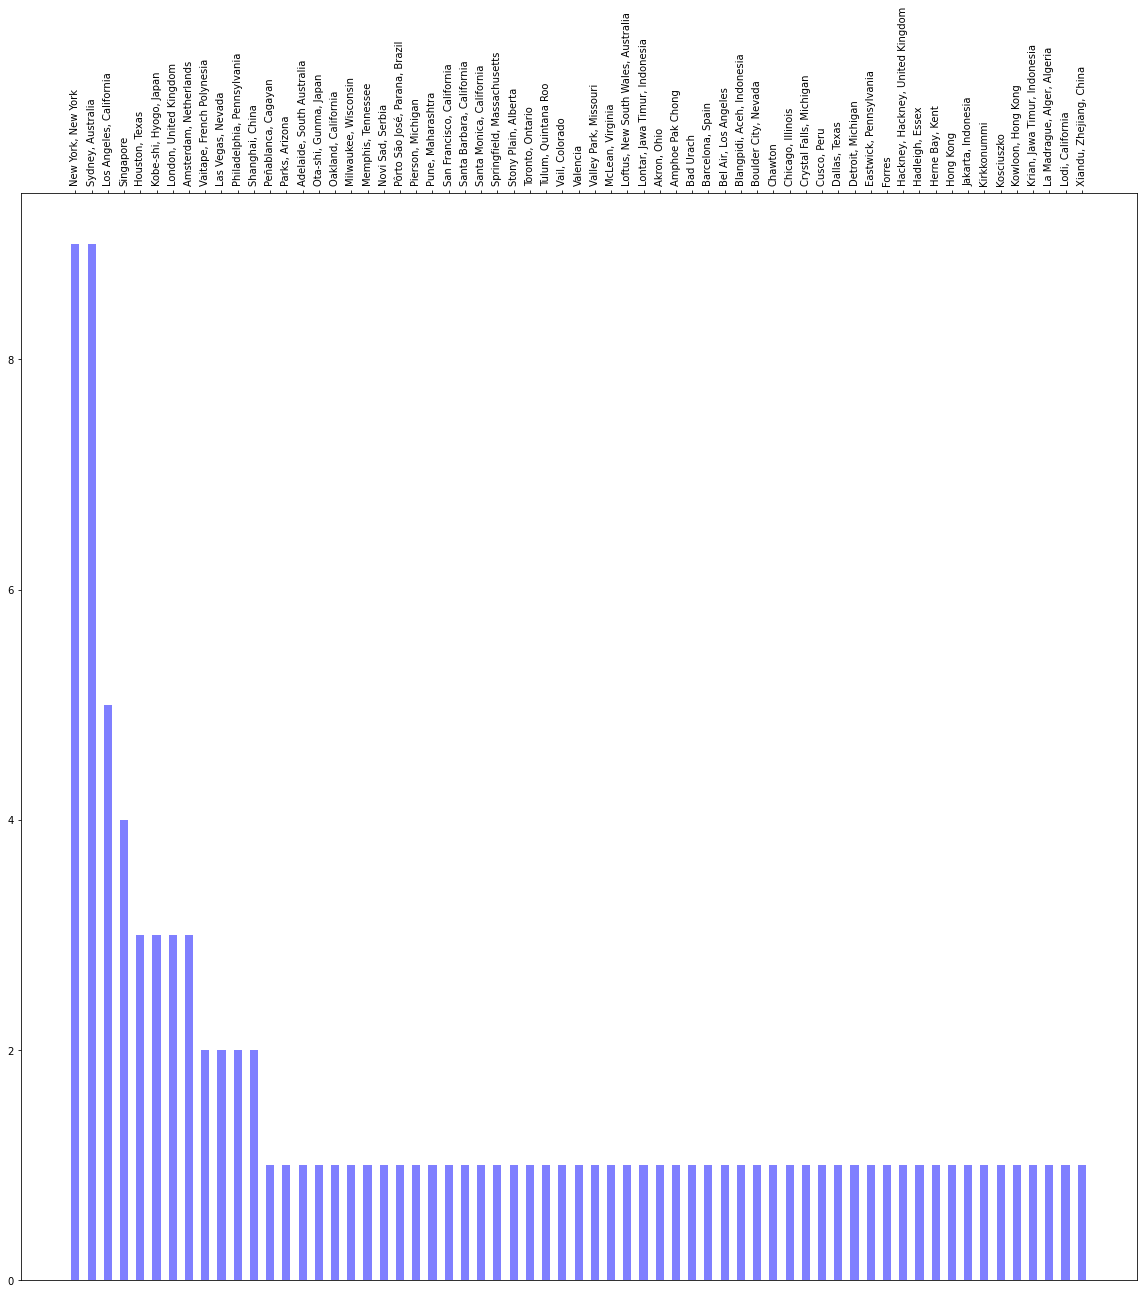

In [194]:
plt.figure(figsize=(20, 20))
ax1=plt.bar(new_df_locations.index,new_df_locations.post_id,width=0.5, alpha=0.5, color='blue')

plt.xticks(new_df_locations.index, new_df_locations.index, rotation='vertical')

plt.show()

## RQ5.4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [201]:
top_profiles

,profile_name,n_posts,followers,profile_id
2880218,instagram,5760.0,285457645.0,2.502532e+07
2582507,victoriassecret,7355.0,65269440.0,3.416684e+06
3820939,nba,28816.0,35339708.0,2.082449e+07
701965,louisvuitton,3352.0,30689316.0,1.876191e+08
2414951,buzzfeedtasty,2791.0,30246783.0,2.125507e+09
2785241,andresiniesta8,990.0,29542143.0,4.968651e+08
333193,hm,4566.0,29176804.0,2.341008e+07
3934581,princessyahrini,4719.0,29042823.0,2.423993e+07
1311970,danbilzerian,1311.0,26476004.0,5.041706e+07
1703764,akshaykumar,1173.0,26252169.0,9.070254e+08


In [203]:
df=pd.merge(posts,top_profiles, on='profile_id')
df=df[['post_id','post_type']]
df

,post_id,post_type
0,Ss3ULFBQeM,1
1,BeECzRuh1O6,1
2,Brl3hGMAxiy,1
3,BZNHb3ijnDT,1
4,uvObMahQV4,1
...,...,...
136,Bw1f3pPnJRr,1
137,Bwy8GNBH9ZH,1
138,Bwx0Wunn1S8,1
139,BwwM4ANnEbm,1


In [209]:
pictures_only=len(df[df.post_type==1])
reel_only=len(df[df.post_type==2])
reel_and_pictures=len(df[df.post_type==3])
print('pictures_only: ',pictures_only)
print('reel_only: ',reel_only)
print('reel_and_pictures: ',reel_and_pictures)

pictures_only:  128
reel_only:  13
reel_and_pictures:  0


In [206]:
#Let's see how many posts we are daling with
total_posts=len(df)
total_posts

141

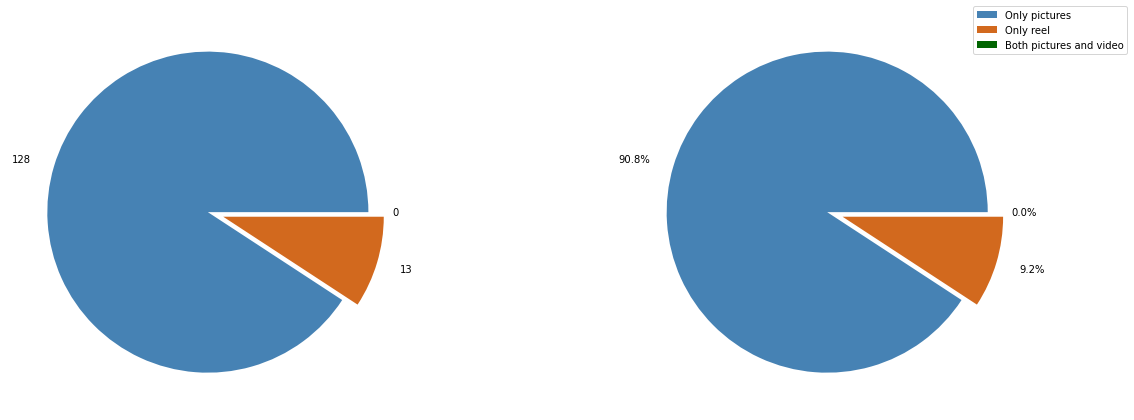

In [207]:
#Showing the result using a pie chart, which is very usefull to catch the difference between the 
pictures_perc='{:.1%}'.format(pictures_only/total_posts)
reel_perc='{:.1%}'.format(reel_only/total_posts)
both_perc='{:.1%}'.format(reel_and_pictures/total_posts)
myexplode=[0.0,0.1,0.0]

#The plots
fig, axs = plt.subplots(1,2)
axs[0].pie([pictures_only,reel_only,reel_and_pictures], labels=[pictures_only,reel_only,reel_and_pictures], 
        labeldistance=1.15, colors=['steelblue','chocolate','darkgreen'], 
           explode=myexplode)
axs[1].pie([pictures_only,reel_only,reel_and_pictures], labels=[pictures_perc,reel_perc,both_perc], 
        labeldistance=1.15, colors=['steelblue','chocolate','darkgreen'], explode=myexplode)
plt.legend(['Only pictures','Only reel','Both pictures and video'], bbox_to_anchor=(0.85,1.025), loc="upper left")

# Some cool features
fig.tight_layout(pad=2.0)
fig.set_figheight(25)
fig.set_figwidth(25)
plt.show() #remove the annoying text

#### Comment of the results

As we can see, there is no top user's post with both pictures and reels. The majority (91.2%) of posts include only pictures, which means that the top user prefers to post mainly pictures, with some exceptions for reels, but never both.

## RQ5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [16]:
#Let's create three datasets, for each post type

df=pd.merge(posts,top_profiles, on='profile_id')
df=df[['post_id','post_type','numbr_likes','number_comments']]
df_only_pictures=df[df.post_type == 1]
df_only_reel=df[df.post_type == 2]
df_mixed=df[df.post_type == 3]

In [27]:
#As for the posts including pictures only, let's count how many likes and comments they have 
only_pic_number_of_likes='{:,}'.format(int(df_only_pictures.numbr_likes.sum()))
only_pic_number_of_comments='{:,}'.format(int(df_only_pictures.number_comments.sum()))

#As for the posts including reel only, let's count how many likes and comments they have
only_reel_number_of_likes='{:,}'.format(int(df_only_reel.numbr_likes.sum()))
only_reel_number_of_comments='{:,}'.format(int(df_only_reel.number_comments.sum()))

#As for the posts including both pictures and reels, let's count how many likes and comments they have
mixed_number_of_likes='{:,}'.format(int(df_mixed.numbr_likes.sum()))
mixed_number_of_comments='{:,}'.format(int(df_mixed.number_comments.sum()))

In [33]:
print('The posts with only pictures received',only_pic_number_of_likes,'likes.')
print('The posts with only pictures received',only_pic_number_of_comments,'comments.')
print('The posts with only reels received',only_reel_number_of_likes,'likes.')
print('The posts with only reels received',only_reel_number_of_comments,'comments.')
print('The mixed posts received',mixed_number_of_likes,'likes.')
print('The mixed posts received',mixed_number_of_comments,'comments.')

The posts with only pictures received 69,285,634 likes.
The posts with only pictures received 497,013 comments.
The posts with only reels received 3,464,814 likes.
The posts with only reels received 26,258 comments.
The mixed posts received 0 likes.
The mixed posts received 0 comments.


In [91]:
#Now let's compare the average of likes and comments with the number of followers

#Compute the amount of followers
followers_sum='{:,}'.format(int(top_profiles.followers.sum()))

#Now the average of likes and comments left under only pictures posts
only_pic_mean_number_of_likes='{:,}'.format(int(df_only_pictures.numbr_likes.mean()))
only_pic_mean_number_of_comments='{:,}'.format(int(df_only_pictures.number_comments.mean()))


#Now the average of likes and comments left under only reels posts
only_reel_mean_number_of_likes='{:,}'.format(int(df_only_reel.numbr_likes.mean()))
only_reel_mean_number_of_comments='{:,}'.format(int(df_only_reel.number_comments.mean()))


#Now the average of likes and comments left under mixed posts
mixed_mean_number_of_likes= 0 #since the sum is 0
mixed_mean_number_of_comments=0 #since the sum is 0

perc_only_pic_likes='{:.2%}'.format(int(df_only_pictures.numbr_likes.mean())/int(top_profiles.followers.sum()))
perc_only_pic_comments='{:.3%}'.format(int(df_only_pictures.number_comments.mean())/int(top_profiles.followers.sum()))
perc_only_reel_likes='{:.2%}'.format(int(df_only_reel.numbr_likes.mean())/int(top_profiles.followers.sum()))
perc_only_reel_comments='{:.1%}'.format(int(df_only_reel.number_comments.mean())/int(top_profiles.followers.sum()))
perc_mixed_likes='{:.1%}'.format(0) #since the mean is 0
perc_mixed_comments='{:.1%}'.format(0) #since the mean is 0


In [99]:
print('The total amount of follower is '+str(followers_sum)+'.')
print('                       ')
print('The posts with only pictures received, on average, ',only_pic_mean_number_of_likes,'likes. This means that, on average, the',perc_only_pic_likes,'of the followers have left a like under a post of the top 10 users.')
print('The posts with only pictures received, on average',only_pic_mean_number_of_comments,'comments. This means that, on average, the',perc_only_pic_comments,'of the followers have left a comment under a post of the top 10 users.')
print('                       ')
print('The posts with only reels received, on average',only_reel_mean_number_of_likes,'likes. This means that, on average, the',perc_only_reel_likes,'of the followers have left a like under a post of the top 10 users.')
print('The posts with only reels received, on average',only_reel_mean_number_of_comments,'comments. This means that, on average, the',perc_only_reel_comments,'of the followers have left a comment under a post of the top 10 users.')
print('                       ')
print('The mixed posts received, on average',mixed_mean_number_of_likes,'likes. This means that, on average, the',perc_mixed_likes,'of the followers have left a like under a post of the top 10 users.')
print('The mixed posts received, on average',mixed_mean_number_of_comments,'comments. This means that, on average, the',perc_mixed_comments,'of the followers have left a comment under a post of the top 10 users.')

The total amount of follower is 587,492,835.
                       
The posts with only pictures received, on average,  541,294 likes. This means that, on average, the 0.09% of the followers have left a like under a post of the top 10 users.
The posts with only pictures received, on average 3,882 comments. This means that, on average, the 0.001% of the followers have left a comment under a post of the top 10 users.
                       
The posts with only reels received, on average 266,524 likes. This means that, on average, the 0.05% of the followers have left a like under a post of the top 10 users.
The posts with only reels received, on average 2,019 comments. This means that, on average, the 0.0% of the followers have left a comment under a post of the top 10 users.
                       
The mixed posts received, on average 0 likes. This means that, on average, the 0.0% of the followers have left a like under a post of the top 10 users.
The mixed posts received, on average 0 

# [RQ6] It's time to get information from the user posting effectiveness.

## RQ6.1 What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.


In [ ]:
#Goal: pick only profile_id shared between posts and profiels

In [89]:
#Let's define the columns/variables we are interested in
posts2=posts[['profile_id','cts','post_id']]
posts2

,profile_id,cts,post_id
0,2.237948e+09,2017-08-06 20:06:57,BXdjjUlgcgq
1,5.579335e+09,2017-06-19 09:31:16,BVg0pbolYBC
2,3.134296e+08,2017-03-11 20:05:03,BRgkjcXFp3Q
3,1.837593e+09,2016-09-13 16:27:16,BKTKeNhjEA7
4,1.131527e+09,2015-10-18 10:19:27,8-NQrvoYLX
...,...,...,...
42710192,5.556457e+09,2017-12-13 15:38:04,BcpWMWGBfxh
42710193,3.371865e+08,2017-10-31 11:28:01,Ba6LZWwlCl8
42710194,3.289886e+09,2017-01-13 20:16:37,BPN0kM1hYUw
42710195,8.536366e+09,2019-05-20 20:07:52,BxsZ8nDBr-L


In [90]:
# Then we sort and rop all NaN values

posts2=posts2.sort_values(by=['profile_id','cts'],ascending=True)
posts2.dropna(inplace=True)
posts2

,profile_id,cts,post_id
35149671,3.000000e+00,2010-07-19 01:12:23,m
4225968,3.000000e+00,2010-08-21 06:40:27,cz
1939650,3.000000e+00,2010-09-05 21:48:24,vY
39517938,3.000000e+00,2010-09-06 18:36:05,xI
39158080,3.000000e+00,2011-01-01 23:56:12,0vQf
...,...,...,...
41457091,9.001013e+13,2019-01-25 04:16:53,BtCrd09BfML
41329574,9.001013e+13,2019-04-12 21:25:36,BwKsonbhrAj
41329493,9.001013e+13,2019-04-12 21:39:06,BwKt_sxBuvf
2370258,9.001013e+13,2019-05-13 07:56:01,BxZEnRBBqNK


In [91]:
new_merge2=pd.merge(posts2,profiles[['profile_id','followers','following']],on='profile_id')
new_merge2

,profile_id,cts,post_id,followers,following
0,4.000000e+00,2010-07-22 12:19:51,BX,4937112.0,825.0
1,4.000000e+00,2010-07-24 03:18:08,Br,4937112.0,825.0
2,4.000000e+00,2010-09-03 07:22:03,ri,4937112.0,825.0
3,4.000000e+00,2011-01-30 20:18:02,BTImA,4937112.0,825.0
4,4.000000e+00,2011-05-01 07:00:36,Du_DN,4937112.0,825.0
...,...,...,...,...,...
25145628,9.001013e+13,2018-02-08 21:29:32,Be9Y7ICBlL-,46.0,55.0
25145629,9.001013e+13,2018-02-12 16:56:11,BfHM0ktAocY,46.0,55.0
25145630,9.001013e+13,2018-03-05 11:03:58,Bf8pNRQgbIu,46.0,55.0
25145631,9.001013e+13,2018-03-09 12:48:27,BgHIV-uhbiP,46.0,55.0


In [92]:
#new_merge2[new_merge2.profile_id == 14407647.0]

In [93]:
#Let's look for NaN
new_merge2.isnull().any()

profile_id    False
cts           False
post_id       False
followers      True
following      True
dtype: bool

In [94]:
#Let's drop them
new_merge2.dropna(subset=['followers','following'],inplace=True)
new_merge2[['followers','following']].isnull().any()


followers    False
following    False
dtype: bool

In [95]:
#Let's ignore profiles with no posts or ony 1 post in order to get meaningful sight. If a profile posted only one post, we are not able to compute the time between one post and another.
some=new_merge2.groupby('profile_id').count()
new_some=some[some.cts > 1]
new_some=new_some.sort_values('cts', ascending=True)
new_some

,cts,post_id,followers,following
profile_id,,,,
7.314576e+09,2,2,2,2
2.175310e+09,2,2,2,2
1.449582e+08,2,2,2,2
7.198791e+09,2,2,2,2
7.070546e+06,2,2,2,2
...,...,...,...,...
5.515448e+09,450,450,450,450
1.296135e+10,526,526,526,526
1.347814e+10,557,557,557,557


In [64]:
#new_some[new_some.profile_id == 14407647.0]

,profile_id,cts,post_id,followers,following
1004397,14407647.0,12,12,12,12


In [96]:
new_some=new_some.reset_index()
new_some[['profile_id']]

,profile_id
0,7.314576e+09
1,2.175310e+09
2,1.449582e+08
3,7.198791e+09
4,7.070546e+06
...,...
1959797,5.515448e+09
1959798,1.296135e+10
1959799,1.347814e+10
1959800,1.287812e+10


In [14]:
new_merge=pd.merge(posts2,new_some,on='profile_id')
new_merge=new_merge[['profile_id','cts_x']]
new_merge.rename(columns={'cts_x':'cts'},inplace=True)
new_merge

,profile_id,cts
0,4.000000e+00,2010-07-22 12:19:51
1,4.000000e+00,2010-07-24 03:18:08
2,4.000000e+00,2010-09-03 07:22:03
3,4.000000e+00,2011-01-30 20:18:02
4,4.000000e+00,2011-05-01 07:00:36
...,...,...
24638234,9.001013e+13,2018-02-08 21:29:32
24638235,9.001013e+13,2018-02-12 16:56:11
24638236,9.001013e+13,2018-03-05 11:03:58
24638237,9.001013e+13,2018-03-09 12:48:27


In [103]:
#new_merge[new_merge.profile_id == 14407647.0]

,profile_id,cts
1182980,14407647.0,2019-05-12 00:53:10
1182981,14407647.0,2019-05-12 14:26:22
1182982,14407647.0,2019-05-12 17:52:04
1182983,14407647.0,2019-05-12 18:09:50
1182984,14407647.0,2019-05-12 22:46:37
1182985,14407647.0,2019-05-12 22:51:08
1182986,14407647.0,2019-05-12 23:43:22
1182987,14407647.0,2019-05-13 22:09:04
1182988,14407647.0,2019-05-13 22:30:31
1182989,14407647.0,2019-05-13 23:58:23


In [130]:
### QUI IL PROBLEMA, quando fai reset index prende differenze di un secondo
diff2=new_merge.set_index('profile_id').diff()
diff2.dropna(inplace=True)
diff2.reset_index(inplace=True)
diff2.drop_duplicates(inplace=True)
diff2=diff2[diff2.cts > np.timedelta64(000000)]
diff2.reset_index(inplace=True)
#diff2[diff2.profile_id == 14407647.0]
diff2=diff2[['profile_id','cts']]
AA=diff2.groupby('profile_id').mean().sort_values('cts',ascending=True)
AA.reset_index(inplace=True)
AA=AA.head(3)
these_profiles=AA[['profile_id']]
these_profiles
#something=diff2.groupby('profile_id').mean().sort_values('cts',ascending=True).head(5)
#something.reset_index(inplace=True)
#these_profiles=something[['profile_id']]
#something

#AA[AA.profile_id == 14407647.0]
#A[['cts']].sort_values('cts',ascending=True).diff().mean()

,profile_id
0,8.562957e+09
1,6.336490e+09
2,5.475679e+09


In [97]:
diff2=new_merge.set_index('profile_id').diff()
diff2.dropna(inplace=True)
diff2.drop_duplicates(inplace=True)
diff2=diff2[diff2.cts > np.timedelta64(000000)]
diff2=diff2.sort_values(['profile_id','cts'],ascending=True)
diff2
#diff2.sort_values(['cts','profile_id'],ascending=False)

,cts
profile_id,
4.000000e+00,0 days 09:27:20
4.000000e+00,1 days 13:04:25
4.000000e+00,1 days 14:58:17
4.000000e+00,1 days 20:05:04
4.000000e+00,3 days 04:12:30
...,...
1.566695e+10,32 days 21:25:23
9.001013e+13,20 days 18:07:47
9.001013e+13,62 days 08:21:13


In [102]:
diff3=diff2
diff3.reset_index(inplace=True)
diff3[diff3.profile_id == 14407647.0]

,index,profile_id,cts
742468,742468,14407647.0,0 days 00:50:42


In [101]:
something=diff3.groupby('profile_id').mean().sort_values('cts',ascending=True).head(10)
something.reset_index(inplace=True)
#these_profiles=something[['profile_id']]
something

,profile_id,cts
0,8580075.0,0 days 00:32:41
1,1322193.0,0 days 00:40:58
2,14407647.0,0 days 00:50:42
3,12431846.0,0 days 00:52:56.666666666
4,520705.0,0 days 00:53:27
5,8089400.0,0 days 00:53:49
6,14729362.0,0 days 01:14:20
7,2186795.0,0 days 01:15:42
8,2657305.0,0 days 01:23:28
9,40690.0,0 days 01:25:08.500000


In [98]:
mean_time=diff2['cts'].mean()
time_to_minutes=mean_time.seconds/60
print('The average time (days and minutes) a user lets pass before publishing another post is: '+str(mean_time.days)+' days and '+str(int(time_to_minutes))+ ' minutes.')


The average time (days and minutes) a user lets pass before publishing another post is: 95 days and 119 minutes.


In [86]:
something=diff2.groupby('profile_id').count()
#.mean().sort_values('cts',ascending=True).head(10)
something.reset_index(inplace=True)
#these_profiles=something[['profile_id']]
something

,profile_id,cts
0,4.000000e+00,36
1,1.900000e+01,50
2,2.800000e+01,91
3,3.400000e+01,19
4,5.600000e+01,2
...,...,...
1499647,1.443701e+10,1
1499648,1.444176e+10,1
1499649,1.445114e+10,1
1499650,1.566695e+10,1


In [52]:
#Non combaciano le medie perchè in posts ci sono molti posts, ma in profiles solo uno e quindi possiamo prendere i followers e following da li
A=posts[posts.profile_id == 14407647.0]
A[['cts']].sort_values('cts',ascending=True).diff().mean()

cts   0 days 06:33:39.636363636
dtype: timedelta64[ns]

In [87]:
profiles[profiles.profile_id == 14407647]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2854292,2028001,14407647.0,ericasuperba,E R I C A B I R C H A L L,Pictures of my life and my dog...mainly my dog...,3728.0,431.0,1830.0,NaN,2019-04-04 14:46:16.999 -0400,False


In [88]:
something[something.profile_id == 14407647]

,profile_id,cts
86397,14407647.0,1


In [ ]:
#QUA SOTTO OK

In [131]:

first=profiles[profiles.profile_id == these_profiles.profile_id[0]][['followers','following','profile_name']]
second=profiles[profiles.profile_id == these_profiles.profile_id[1]][['followers','following','profile_name']]
third=profiles[profiles.profile_id == these_profiles.profile_id[2]][['followers','following','profile_name']]



In [132]:
top3=pd.concat([first,second,third])
top3

,followers,following,profile_name
2059644,13.0,25.0,lama_anbar
887429,186.0,1598.0,nachithogudino
2211415,82.0,395.0,inafasya77


In [135]:
top3_2=pd.concat([profiles[profiles.profile_name == 'lama_anbar'],profiles[profiles.profile_name == 'nachithogudino'],profiles[profiles.profile_name == 'inafasya77']])
top3_2

#They post less than my granmother fuck off you are screwing my analysis up

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2059644,2763877,8.562957e+09,lama_anbar,Lama_anbar,NaN,25.0,13.0,3.0,NaN,2019-04-09 08:42:14.826 -0400,False
887429,658430,6.336490e+09,nachithogudino,Nachitho Gudiño,NaN,1598.0,186.0,2.0,NaN,2019-03-24 05:37:28.532 -0400,False
2211415,2838569,5.475679e+09,inafasya77,inafasya77,NaN,395.0,82.0,2.0,NaN,2019-04-09 13:17:53.778 -0400,False


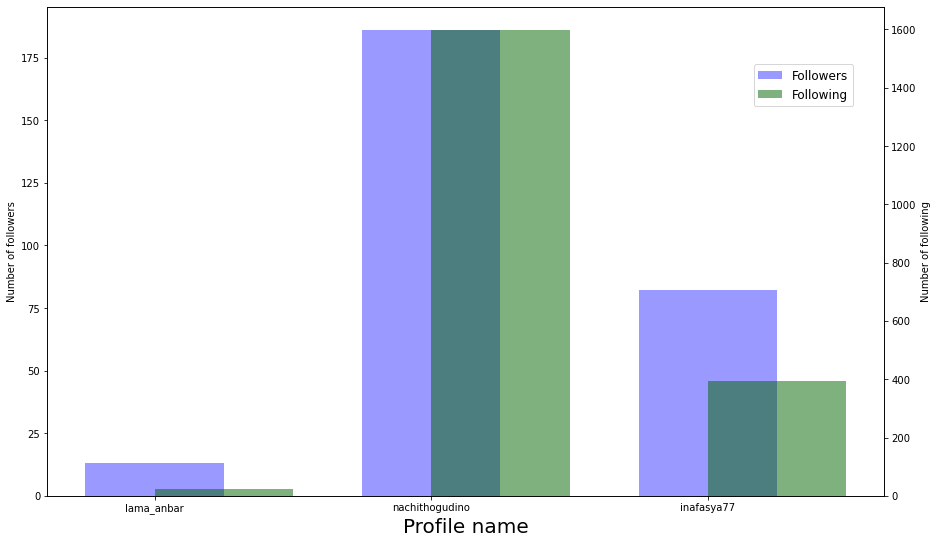

In [133]:
#Now let's plot it

# I'm using white labels because my theme on VS is dark
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.set_xlabel('Profile name',size=20)
ax1.xaxis.label.set_color('black')
ax1.yaxis.label.set_color('black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')

# plot line chart on axis #1
ax1.bar(top3['profile_name'], top3['followers'], width=0.5, alpha=0.4, color='Blue')
ax1.set_ylabel('Number of followers')
plt.xticks(top3['profile_name'], top3['profile_name'])

# ax1.set_ylim(0, 25)
# set up the 2nd axis

ax2 = ax1.twinx()
ax2.yaxis.label.set_color('black')
ax2.tick_params(axis='y', colors='black')

# plot bar chart on axis #2
ax2.bar(top3['profile_name'], top3['following'], width=0.5, alpha=0.5, color='darkgreen', align='edge')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Number of following')
#ax2.set_ylim(0, 90)
fig.legend(['Followers','Following'], loc="upper center",bbox_to_anchor=(0.5, 0.3, 0.65, 0.5),fontsize='large')
plt.show()

In [102]:
###

# first is a zoccola
# second is a boomer
# third is an online store

## RQ6.2 Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

# [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures

## RQ7.1 What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [7]:
#Creating two different datasets picking only the columns we are interested in
posts2=posts[['numbr_likes','post_id','profile_id']]
profiles2=profiles[['profile_id','followers']]

In [17]:
#Cleaning them dropping all NaN values
posts2.dropna(inplace=True)
profiles2.dropna(inplace=True)

/Users/the_redd_/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
# Merging the datasets on the shared column 'profile_id'
df=pd.merge(posts2,profiles2, on='profile_id')

In [19]:
#Considering only profiles with more than 0 followers in order to get meaningful sight
df=df[df.followers != 0]

In [20]:
# We want to compute the number of favourable cases on total cases, so let's get the favourable one
yes_df=df[df.numbr_likes > (df.followers/5)]
yes=len(yes_df)
yes_df

,numbr_likes,post_id,profile_id,followers
24,253.0,BvLnQ5QFHAs,2.237948e+09,1204.0
54,46.0,BxAN-l4JkNe,6.027751e+09,164.0
55,33.0,BxLCLD6pDrm,6.027751e+09,164.0
56,33.0,BxGCc1CpF4P,6.027751e+09,164.0
57,51.0,Bw5Is3aJTGJ,6.027751e+09,164.0
...,...,...,...,...
24708503,407.0,BiPYeRYFZOQ,2.297958e+09,1068.0
24708518,21.0,BxAvwoTg2BO,5.562025e+09,96.0
24708522,2103.0,BxkCF0dlgXp,1.171138e+10,13.0
24708628,117.0,ByA5yttBFbT,3.723950e+09,377.0


In [21]:
#Now let's compute
prob=yes/(len(df))


print('The probability that a post receives more than 20% "likes" of the number of followers a user has is equal to: ',"{0:.2%}".format(prob) )

The probability that a post receives more than 20% "likes" of the number of followers a user has is equal to:  15.71%


## RQ7.2 Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [22]:
locations

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628


In [37]:
posts2=posts[['location_id','profile_id','post_id']]
posts2.rename(columns={'location_id':'id'},inplace=True)

df=pd.merge(posts2,locations[['city','id','cts']], on='id')
df

/Users/the_redd_/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,profile_id,post_id,city,cts
0,1.022366e+15,2.237948e+09,BXdjjUlgcgq,Llangollen,2019-05-30 11:32:30.527
1,1.022366e+15,2.237948e+09,Bunhd1DFVAG,Llangollen,2019-05-30 11:32:30.527
2,1.022366e+15,2.237948e+09,Bppi85gliQK,Llangollen,2019-05-30 11:32:30.527
3,1.022366e+15,2.237948e+09,BwBj2vhFuGH,Llangollen,2019-05-30 11:32:30.527
4,1.022366e+15,2.237948e+09,Be93_r7Bnhq,Llangollen,2019-05-30 11:32:30.527
...,...,...,...,...,...
28063760,2.519379e+14,6.231543e+09,Bva76T8BdLv,Lapu-Lapu City,2019-05-30 11:32:15.473
28063761,2.519379e+14,8.075379e+09,BvXwLTOlwnY,Lapu-Lapu City,2019-05-30 11:32:15.473
28063762,2.519379e+14,4.617856e+09,Bu1FvIZFOCL,Lapu-Lapu City,2019-05-30 11:32:15.473
28063763,2.519379e+14,1.418531e+09,Bu0on2DBIks,Lapu-Lapu City,2019-05-30 11:32:15.473


In [7]:
locations2=df[['city','id','cts','profile_id']]
locations2

,city,id,cts
0,NaN,110296492939207,2019-05-29 01:21:29.987
1,Nová Vieska,274391278,2019-05-29 01:21:38.037
2,"Kathmandu, Nepal",148885595789195,2019-05-29 01:21:46.295
3,"Paris, France",263258277,2019-05-29 01:21:54.355
4,"Burbank, California",406147529857708,2019-04-02 15:22:55.703
...,...,...,...
1022653,"Santa Cruz de la Sierra, Bolivia",873926439475785,2019-05-29 01:20:57.078
1022654,NaN,390707529,2019-05-29 01:21:04.434
1022655,"Orland Park, Illinois",1205466612894741,2019-05-29 01:21:13.404
1022656,"Wellington, New Zealand",286794844,2019-05-29 01:21:21.628


In [10]:
locations2.dropna(inplace=True)
locations2

/Users/the_redd_/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,city,id,cts
1,Nová Vieska,274391278,2019-05-29 01:21:38.037
2,"Kathmandu, Nepal",148885595789195,2019-05-29 01:21:46.295
3,"Paris, France",263258277,2019-05-29 01:21:54.355
4,"Burbank, California",406147529857708,2019-04-02 15:22:55.703
6,Singapore,1651686855080719,2019-05-29 01:21:56.635
...,...,...,...
1022650,"Ulaanbaatar, Mongolia",1152694124762643,2019-05-29 01:20:35.930
1022652,"New Hope, Pennsylvania",165279020220723,2019-05-29 01:20:49.942
1022653,"Santa Cruz de la Sierra, Bolivia",873926439475785,2019-05-29 01:20:57.078
1022655,"Orland Park, Illinois",1205466612894741,2019-05-29 01:21:13.404


In [38]:
#Count how many time a location has been visited
df_returned=df.groupby('city').count().sort_values('id', ascending=True)

In [39]:
df_returned

,id,profile_id,post_id,cts
city,,,,
"Ménélas, Ouest, Haiti",1,0,1,1
"Musques, Pais Vasco, Spain",1,0,1,1
"Murrumbeena, Victoria",1,0,1,1
"Blackpool, Cork",1,0,1,1
"Murray, Arkansas",1,0,1,1
...,...,...,...,...
"Los Angeles, California",191435,158296,191435,191435
"Saint Petersburg, Russia",411924,407809,411924,411924
"London, United Kingdom",964564,937322,964564,964564


In [28]:
df_returned=df_returned[df_returned.id != 1]
df_returned

,id,cts
city,,
Greyabbey,2,2
"Preston, Washington",2,2
"Ban Thalat Choeng Thale, Phuket, Thailand",2,2
"Chittorgarh, India",2,2
Pravets,2,2
...,...,...
"Los Angeles, California",7175,7175
"Saint Petersburg, Russia",8636,8636
"London, United Kingdom",20251,20251


In [41]:
df_group=df.groupby(by='profile_id',group_keys=True).apply(lambda x: x)
df_group

KeyboardInterrupt: 

# [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

## RQ8.1 Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts?

In [ ]:
plt.scatter(posts['numbr_likes'], posts['number_comments'],s=3, alpha=0.5)
plt.show()

To have a better understanding of what we are trying to find (the correlation) we are gonna calculate the pearson correlation coefficient

In [16]:
#Pearsonn Correlation
posts.number_comments.corr(posts.numbr_likes)

NameError: name 'posts' is not defined

As we can see from the scatterplot above and the result value from the pearson correlation coefficient. If the number of likes were related to the number of comments then we would be seeing a proportional increase of both value, while from the scatterplot we see that at the increase of the number of likes, the number of comments doesnt increase.

## RQ8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

## RQ8.3 What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

In [ ]:
plt.hist(followers, log=True, bins=15)
plt.show()

As we can see from the plot above, it is not very clear

For a greater possibility of interpreting the distribution we use the logarithmic scale, but we have many values ​​= 0. To solve this problem we will first increase all the values ​​by 1, in this way we will no longer have values ​​equal to zero and at the same time the distribution remains unchanged .



In [ ]:
f_plus_1 = followers.apply(lambda x: x+1)
followers_log = f_plus_1.apply(np.log)

After applying the logarithmic scale, we plot.

In [ ]:
#lets plot the density function of the distribution of followers
sns.histplot( ciao , kde = True, bins=60)

We extract the mean, mode and quantiles

In [ ]:
profiles.followers.describe()

## RQ8.4 What are histograms, bar plots, scatterplots and pie charts used for?

Histograms are useful for seeing the center, distribution, and shape of a data set. They can also be used as a visual tool for verifying normality.
The horizontal axis represents the data values ​​and each bar includes a range of values. The vertical axis indicates how many points in the data have values ​​within the specified range of the bar.

Bar charts are suitable for representing one or more categorical variables. In this type of graph, each mode of the variable (category) is represented by a bar, whose height (or length) is proportional to the frequency or percentage of the mode itself.

A scatter plot shows the relationship between two continuous variables. Scatter plots are used to show relationships between data. For correlation, they help show the strength of the linear relationship between two variables, while for regression they often add an estimated line.

## RQ8.5 What insights can you extract from a Box Plot?

A box plot allows you to visualize the center and distribution of the data. In addition, it can be used as a visual tool for checking for normality or for identifying possible outliers.